# Lead Scoring Case Study - Sumit and Akash

## Problem Statement:

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

The ask here is to build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Importing the libraries.

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#to display all the columns and rows.
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 3000)

In [4]:
# Reading the csv file
lead_data = pd.read_csv('leads.csv')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inspecting the dataset

In [5]:
lead_data.shape

(9240, 37)

In [6]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Cleaning the dataset

In [8]:
# Dropping 'Prospect ID' and 'Lead Number' since they won't be of any use in the analysis
lead_data.drop(['Prospect ID','Lead Number'], axis = 1, inplace = True)
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
# There are many columns with entry 'Select'. Replacing Select with nulls
lead_data = lead_data.replace('Select', np.nan)

In [10]:
# Checking null values in columns of lead_data
round(lead_data.isnull().mean()*100,2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me 

In [11]:
# Dropping columns with more than 40% of null values
lead_data = lead_data.loc[:,lead_data.isnull().mean()<=0.4]
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [12]:
# Checking null values in columns of lead_data
round(lead_data.isnull().mean()*100,2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Magazine  

In [13]:
# Checking unique entries in 'Country'
lead_data.Country.value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Canada                     4
Germany                    4
South Africa               4
Nigeria                    4
Kuwait                     4
Sweden                     3
Italy                      2
China                      2
Belgium                    2
Ghana                      2
Philippines                2
Uganda                     2
Bangladesh                 2
Asia/Pacific Region        2
Netherlands                2
Russia                     1
Vietnam                    1
Indonesia                  1
Switzerland                1
Liberia                    1
Malaysia      

In [14]:
# Checking unique entries in 'City'
lead_data.City.value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

The variable 'City' and 'Country' won't be very useful in the model, hence it is better to drop them

In [15]:
#Dropping country and city and country
lead_data.drop(['City','Country'], axis = 1, inplace = True)
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


In [16]:
# Checking value counts of all categorical columns
for column in lead_data:
    if lead_data[column].dtype == 'O':
        print("'"+column+"'")
        print(lead_data[column].astype('category').value_counts(dropna=False))
        print('\n')

'Lead Origin'
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


'Lead Source'
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
NC_EDM                  1
WeLearn                 1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64


'Do Not Email'
No     8506
Yes     734
Name: Do Not Email, dtype: int64


'Do Not Call'
No     9238
Yes       2
Name: Do Not Call, dtype: int64


'Last Activity'
Email Open

Dropping 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque' since almost all the values of these variables are NO.

In [17]:
lead_data.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [18]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,Interested in other courses,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,Ringing,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,Better Career Prospects,Will revert after reading the email,No,Modified


In [19]:
# Dropping "What matters most to you in choosing a course" since except 3 entries all others are either 'Better Career Prospects' or nulls.
lead_data.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Interested in other courses,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,Will revert after reading the email,No,Modified


In [20]:
# Checking the null values again
round(lead_data.isnull().mean()*100,2).sort_values(ascending=False)

Specialization                            36.58
Tags                                      36.29
What is your current occupation           29.11
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
Lead Origin                                0.00
Do Not Email                               0.00
Converted                                  0.00
Total Time Spent on Website                0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [21]:
# Replacing Nulls with 'Not Specified' in "Specialization". We will anyway remove these options while creating dummy variables
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Not Specified')
lead_data['Tags'] = lead_data['Tags'].replace(np.nan, 'Not Specified')

In [22]:
lead_data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [23]:
# Replacing NaN with 'Unemployed' in "What is your current occupation"
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.nan, 'Not Provided')

In [24]:
lead_data['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
youtubechannel          1
blog                    1
testone                 1
WeLearn                 1
NC_EDM                  1
Pay per Click Ads       1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [25]:
# Replacing NaN values and combining low frequency values
lead_data['Lead Source'] = lead_data['Lead Source'].replace(np.nan,'Google')
lead_data['Lead Source'] = lead_data['Lead Source'].replace('Google','google')
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Social Media','Live Chat'] ,'Others')

lead_data['Lead Source'].value_counts(dropna=False)

google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: Lead Source, dtype: int64

In [26]:
lead_data['Tags'].value_counts(dropna=False)

Not Specified                                        3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [27]:
# Grouping low frequency Tags as "Other Tags" in order to avoid class imbalance
lead_data['Tags'] = lead_data['Tags'].replace(['invalid number', 'Diploma holder (Not Eligible)','wrong number given',
                                     'opp hangup','number not provided','in touch with EINS', 'Lost to Others','Still Thinking',
                                    'Want to take admission but has financial problems','Interested in Next batch',
                                    'In confusion whether part time or DLP','Lateral student',
                                    'Recognition issue (DEC approval)','Shall take in the next coming month',
                                    'University not recognized'], 'Other_Tags')

lead_data['Tags'].value_counts(dropna=False)

Not Specified                          3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Other_Tags                              302
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Name: Tags, dtype: int64

In [28]:
lead_data['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [29]:
# Replacing NaN with 'Email Opened' and grouping low frequency values in the column "Last Activity" as 'Others'

lead_data['Last Activity'] = lead_data['Last Activity'].replace(np.nan,'Email Opened')
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

lead_data['Last Activity'].value_counts(dropna=False)

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [30]:
lead_data['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
Resubscribed to emails             1
Form Submitted on Website          1
View in browser link Clicked       1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

In [31]:
# Grouping low frequency values in the column "Last Notable Activity" as 'Others'

lead_data['Last Notable Activity'] = lead_data['Last Notable Activity'].replace(['Email Bounced', 'Unsubscribed', 'Unreachable',
                                                                         'Had a Phone Conversation', 'Email Marked Spam',
                                                                         'Resubscribed to emails', 'Email Received', 
                                                                         'Approached upfront', 
                                                                         'View in browser link Clicked',
                                                                         'Form Submitted on Website'],'Others')

lead_data['Last Notable Activity'].value_counts(dropna=False)

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      160
Name: Last Notable Activity, dtype: int64

In [32]:
# Checking the null values again
round(lead_data.isnull().mean()*100,2).sort_values(ascending=False)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Converted                                 0.00
Total Time Spent on Website               0.00
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
Tags                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [33]:
# Dropping all rows with null values since it's less than 1.5%
lead_data = lead_data.dropna()
round(lead_data.isnull().mean()*100,2).sort_values(ascending=False)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [34]:
lead_data.shape

(9103, 13)

In [35]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,No,Modified
4,Landing Page Submission,google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,No,Modified


#### Converting some binary variables (Yes/No) to 0/1

In [36]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [37]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,0,Modified
4,Landing Page Submission,google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,0,Modified


### Exploratory Data Analysis

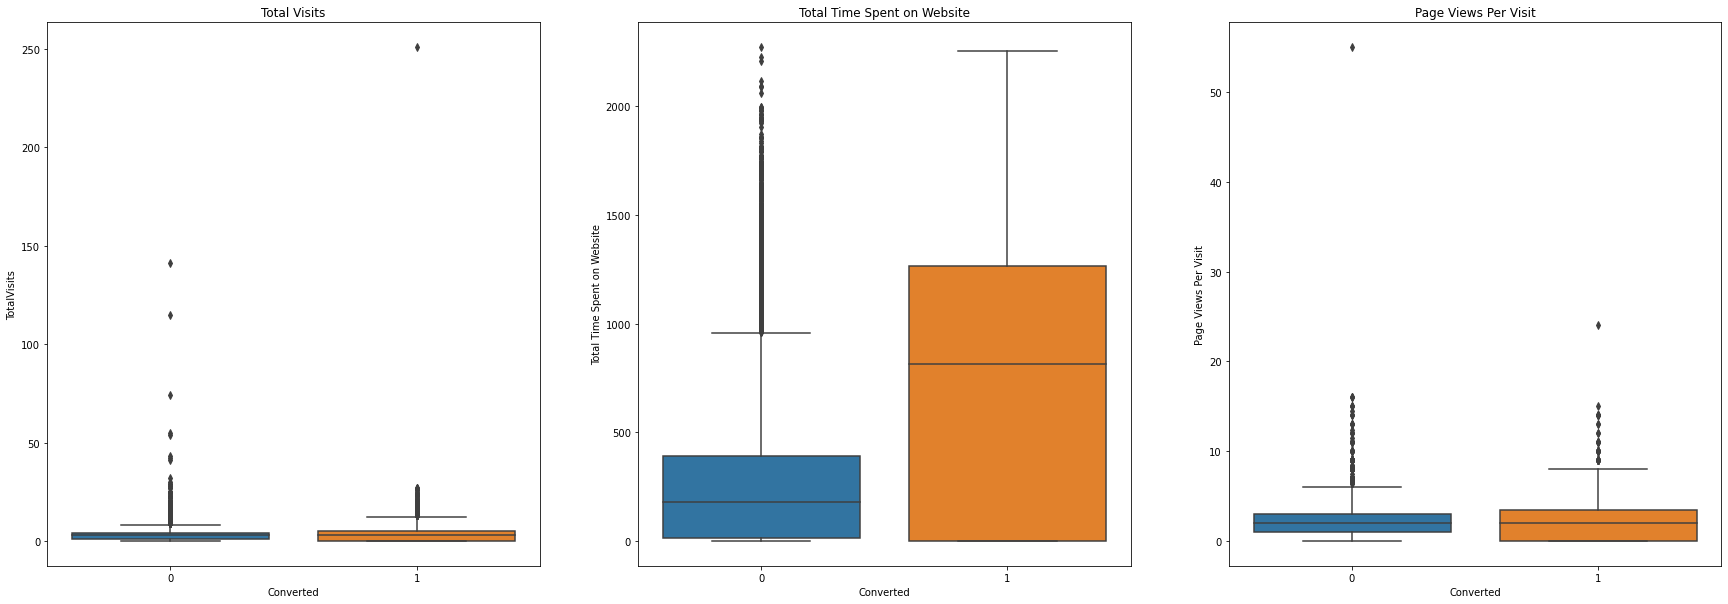

In [38]:
# Box plot for 'TotalVisits', 'Total Time Spent on Website' and 'Page Views Per Visit'
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,10))
sns.boxplot(data = lead_data, y='TotalVisits', x='Converted', ax=ax1)
sns.boxplot(data = lead_data, y='Total Time Spent on Website', x='Converted', ax=ax2)
sns.boxplot(data = lead_data, y='Page Views Per Visit', x='Converted', ax=ax3)
ax1.title.set_text('Total Visits')
ax2.title.set_text('Total Time Spent on Website')
ax3.title.set_text('Page Views Per Visit')
plt.show()

**`Inferences:`** As expected, people who have converted have higher number of visits, spent more time on website and also have higher page views.

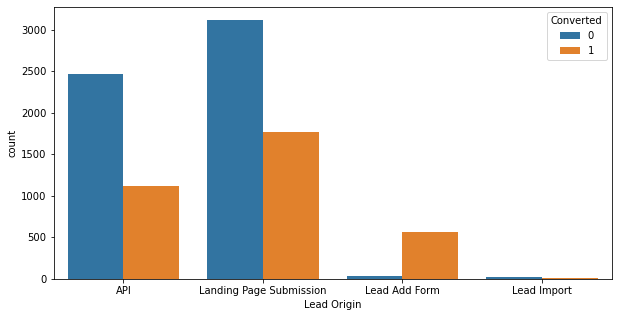

In [39]:
# Plotting Distribution of 'Lead Origin'
plt.figure(figsize = (10,5))
ax1=sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data)
plt.show()

**`Inferences:`** A person who has done 'Lead Add Form' are very much likely to convert.

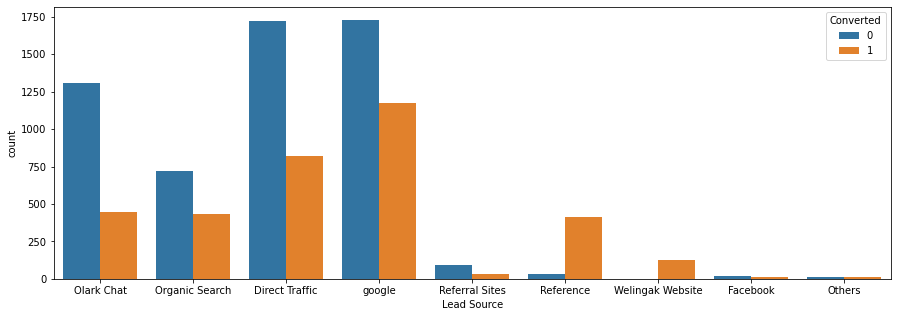

In [40]:
# Plotting Distribution of 'Lead Source'
plt.figure(figsize = (15,5))
ax1=sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data)
plt.show()

**`Inferences:`** Google has the highest number of leads with a good conversion rate

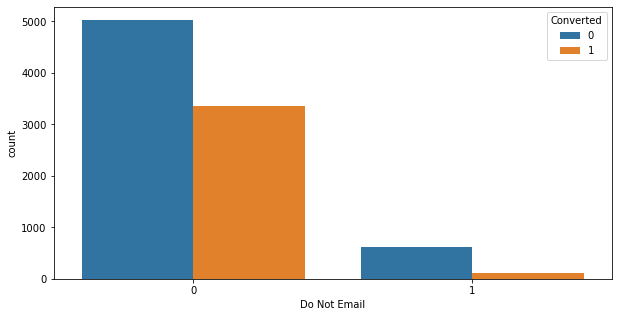

In [41]:
# Plotting Distribution of 'Do Not Email'
plt.figure(figsize = (10,5))
ax1=sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_data)
plt.show()

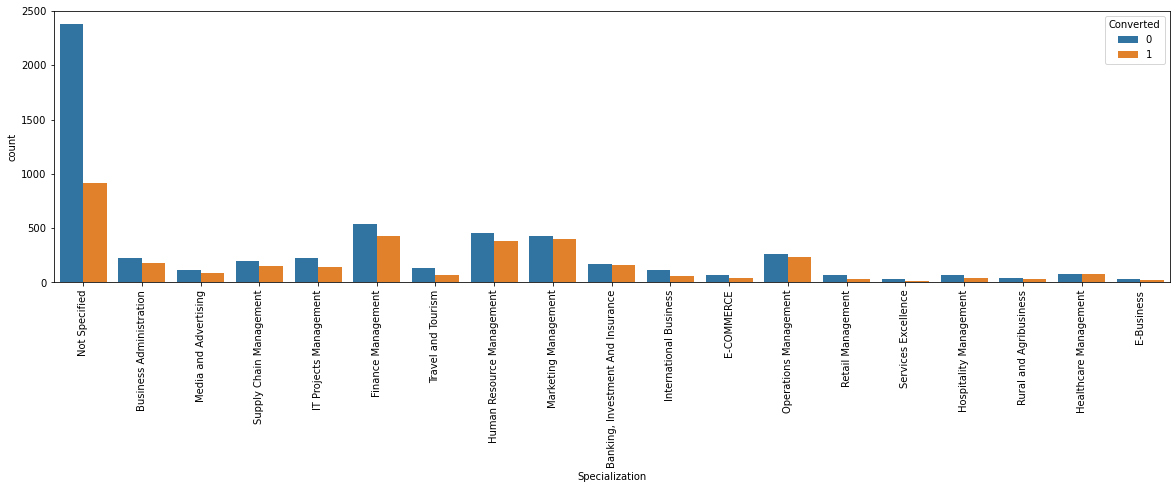

In [42]:
# Plotting Distribution of 'Specialization'
plt.figure(figsize = (20,5))
ax1=sns.countplot(x = "Specialization", hue = "Converted", data = lead_data)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

**`Inferences:`** Management related specializations have a large share share in the overall data. Also, since this was an optional entry majority of the people have not specified their specialization.

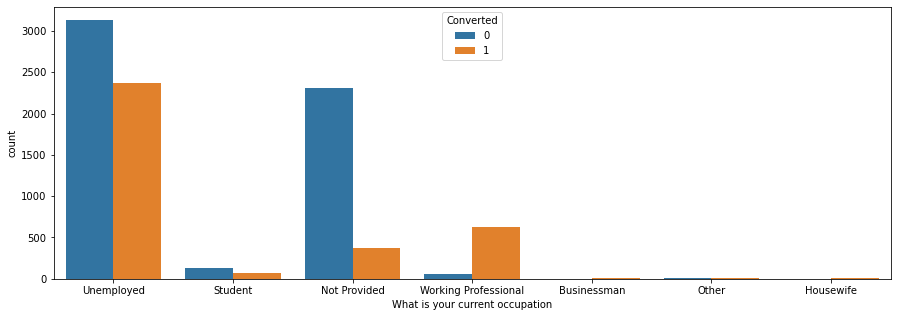

In [43]:
# Plotting Distribution of 'What is your current occupation'
plt.figure(figsize = (15,5))
ax1=sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data)
plt.show()

**`Inferences:`** Majority of the people are 'Unemployed'. It is surprising to see that 'Working Professional' has a really good conversion rate.

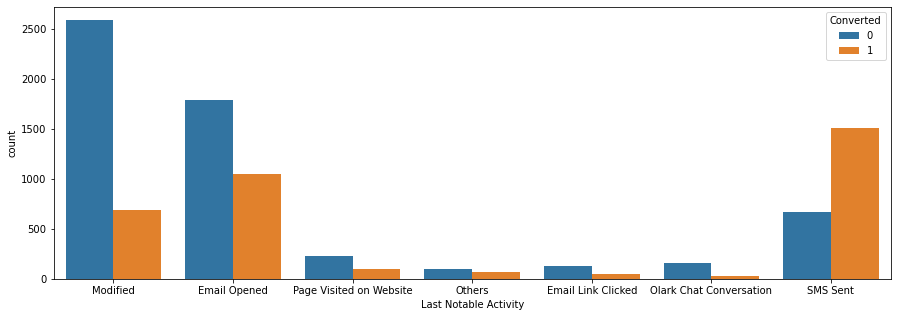

In [44]:
# Plotting Distribution of 'Last Notable Activity'
plt.figure(figsize = (15,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_data)
plt.show()

**`Inferences:`** 'SMS Sent' has the best conversion rate.

### Creating dummy features for categorical variables

In [45]:
# Creating dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(lead_data[['Lead Origin', 'What is your current occupation']], drop_first=True)
lead_data = pd.concat([lead_data, dummy], axis = 1)

dummy_lead_source = pd.get_dummies(lead_data['Lead Source'], prefix = 'Lead Source')
dummy_lead_source = dummy_lead_source.drop(['Lead Source_Others'], 1)
lead_data = pd.concat([lead_data, dummy_lead_source], axis = 1)

dummy_activity = pd.get_dummies(lead_data['Last Activity'], prefix = 'Last Activity')
dummy_activity = dummy_activity.drop(['Last Activity_Others'], 1)
lead_data = pd.concat([lead_data, dummy_activity], axis = 1)

dummy_notable_activity = pd.get_dummies(lead_data['Last Notable Activity'], prefix = 'Last Notable Activity')
dummy_notable_activity = dummy_notable_activity.drop(['Last Notable Activity_Others'], 1)
lead_data = pd.concat([lead_data, dummy_notable_activity], axis = 1)


dummy_specialization = pd.get_dummies(lead_data['Specialization'], prefix = 'Specialization')
dummy_specialization = dummy_specialization.drop(['Specialization_Not Specified'], 1)
lead_data = pd.concat([lead_data, dummy_specialization], axis = 1)

dummy_tags = pd.get_dummies(lead_data['Tags'], prefix = 'Tags')
dummy_tags = dummy_tags.drop(['Tags_Not Specified'], 1)
lead_data = pd.concat([lead_data, dummy_tags], axis = 1)

In [46]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Not Provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Olark Chat,...,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,0,Modified,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,0,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened,1,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,0,Modified,1,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,0,Modified,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [47]:
# Dropping the variables for which the dummy variables have been created

lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity',
                   'Specialization', 'What is your current occupation', 'Tags', 'Last Notable Activity'], 1)

In [48]:
lead_data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Not Provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_google,Last Activity_Converted to Lead,Last Activity_Email Bounced,...,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [49]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 67 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9103 non-null   int64  
 1   Converted                                             9103 non-null   int64  
 2   TotalVisits                                           9103 non-null   float64
 3   Total Time Spent on Website                           9103 non-null   int64  
 4   Page Views Per Visit                                  9103 non-null   float64
 5   A free copy of Mastering The Interview                9103 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9103 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9103 non-null   uint8  
 8   Lead Origin_Lead Import                               9103

### Train-Test Split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
# Putting feature variable to X
X = lead_data.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Not Provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_google,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,...,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [52]:
# Putting response variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [53]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Not Provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_google,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,...,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
7962,0,-0.092900,1.476324,-0.394072,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5520,0,0.695064,-0.771066,2.111481,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1962,0,0.301082,-0.571257,0.061483,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1566,0,2.074000,1.393834,0.517039,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9170,0,-0.683873,-0.881052,-1.077404,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [56]:
# Checking the Lead conversion Rate
lead_rate = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
lead_rate

38.02043282434362

### Looking at Correlations

In [57]:
lead_data.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Not Provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_google,Last Activity_Converted to Lead,Last Activity_Email Bounced,...,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
Do Not Email,1.000000,-0.136553,0.033842,-0.047943,0.033582,0.056098,0.096400,-0.021721,-0.017183,-0.009247,0.050412,-0.001932,0.006908,-0.022084,-0.047911,0.110165,-0.017183,-0.051918,0.034433,-0.036293,-0.010263,0.002542,-0.066919,-0.063374,0.616344,...,0.014074,0.011733,-0.019169,0.070045,0.002954,-0.026229,-0.000182,-0.013841,0.023552,0.028196,0.054132,0.003145,0.060457,0.036913,-0.016441,-0.047546,-0.017862,-0.011677,-0.027360,-0.031993,0.140960,0.072797,-0.019960,-0.097307,0.027652
Converted,-0.136553,1.000000,0.030395,0.354939,-0.003328,-0.033079,-0.040698,0.306224,-0.010824,0.040166,-0.322672,0.018395,-0.005620,0.128250,0.315113,-0.075079,-0.010824,-0.125395,-0.001874,0.254067,-0.032135,0.149250,0.033821,-0.116238,-0.127649,...,0.030085,0.005768,0.048835,0.000974,-0.008079,0.066812,0.011059,0.044595,-0.008729,0.008234,-0.014398,0.019467,-0.008912,-0.178637,0.055591,0.233576,-0.072586,-0.082930,-0.177806,0.171081,-0.097839,-0.118259,-0.280750,0.653046,-0.123234
TotalVisits,0.033842,0.030395,1.000000,0.221240,0.512125,0.202273,0.291913,-0.173909,-0.038378,-0.006485,-0.050604,0.029749,-0.023857,0.054206,-0.004592,0.096821,-0.036824,-0.311123,0.194257,-0.146946,0.081541,-0.079727,0.103621,-0.070616,-0.046756,...,0.035823,0.018057,0.063313,0.030761,0.035273,0.023749,0.044253,0.020994,0.037444,0.058227,0.016145,0.063306,0.064377,-0.044302,0.024959,0.018601,0.001769,-0.003560,0.015007,0.005796,0.028637,0.006326,0.051345,0.022429,0.015274
Total Time Spent on Website,-0.047943,0.354939,0.221240,1.000000,0.320361,0.179005,0.294515,-0.194106,-0.051363,0.006983,-0.145463,0.031519,-0.012600,0.083707,0.096616,0.142287,-0.050020,-0.376633,0.101911,-0.162064,0.012850,-0.091594,0.210321,-0.008109,-0.036669,...,0.028396,0.037114,0.067593,0.035296,0.023475,0.068576,0.043585,0.062277,0.029044,0.021989,0.003712,0.051439,0.043746,-0.071193,0.060652,0.036720,-0.031095,-0.018853,-0.053879,0.075813,-0.020627,-0.023822,-0.052703,0.263795,-0.026352
Page Views Per Visit,0.033582,-0.003328,0.512125,0.320361,1.000000,0.277263,0.485950,-0.274411,-0.056927,-0.007707,-0.074548,0.019910,-0.032147,0.081458,-0.008064,0.134901,-0.053437,-0.500880,0.305074,-0.231325,0.085105,-0.124946,0.199736,-0.063862,-0.036905,...,0.039216,0.033385,0.082672,0.075065,0.069822,0.056897,0.066379,0.049436,0.045983,0.025926,0.021246,0.065544,0.113662,-0.061271,0.056233,-0.051157,0.018695,0.008040,0.002123,-0.019922,0.010048,0.029122,0.116657,0.050592,0.047971
A free copy of Mastering The Interview,0.056

### Model Building

In [58]:
import statsmodels.api as sm

In [59]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           66
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1052.6
Date:                Tue, 07 Dec 2021   Deviance:                       2105.3
Time:                        15:56:24   Pearson chi2:                 1.11e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3480      1.716      0.786      0.432      -2.014       4.710
Do Not Email                                            -1.0584      0.318     -3.328      0.001      -1.682      -0.435
TotalVisits                                              0.1360      0.045      3.049      0.002       0.049       0.223
Total Time Spent on Website                              1.0511      0.068     15.509      0.000       0.918       1.184
Page Views Per Visit                                    -0.0609      0.078     -0.778      0.437      -0.214       0.093
A free copy of Mastering The Interview                  -0.0722      0.188     -0.383      0.702      -0.442       0.297
Lead Origin_Landing Page Submission                     -0.3387      0.240     -1.413      0.158      -0.808       0.131
Lead Origin_Lead Add Form                                1.0662      1.067      0.999      0.318      -1.025       3.157
Lead Origin_Lead Import                                  2.5703      2.112      1.217      0.224      -1.570       6.710
What is your current occupation_Housewife               20.5242   1.68e+04      0.001      0.999   -3.28e+04    3.29e+04
What is your current occupation_Not Provided            -1.6386      1.293     -1.267      0.205      -4.174       0.897
What is your current occupation_Other                    1.0692      1.873      0.571      0.568      -2.602       4.740
What is your current occupation_Student                  0.9670      1.428      0.677      0.498      -1.833       3.767
What is your current occupation_Unemployed               1.0159      1.289      0.788      0.431      -1.510       3.542
What is your current occupation_Working Professional     1.4243      1.328      1.073      0.283      -1.178       4.026
Lead Source_Direct Traffic                              -0.9809      1.047     -0.937      0.349      -3.034       1.072
Lead Source_Facebook                                    -3.3047      2.348     -1.408      0.159      -7.906       1.297
Lead Source_Olark Chat                                  -0.0505      1.050     -0.048      0.962      -2.108       2.007
Lead Source_Organic Search                              -0.8033      1.052     -0.764      0.445      -2.864       1.258
Lead Source_Reference                                   -0.6855      1.485     -0.461      0.644      -3.597       2.226
Lead Source_Referral Sites                              -0.9620      1.169     -0.823      0.411      -3.253       1.330
Lead Source_Welingak Website                             1.5093      1.586      0.952      0.341      -1.599       4.618
Lead Source_google                                      -0

#### Feature Selection using RFE

In [60]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [61]:
# Running RFE with 15 variables as output
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [62]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [63]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 2),
 ('TotalVisits', False, 39),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 45),
 ('A free copy of Mastering The Interview', False, 47),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', False, 5),
 ('Lead Origin_Lead Import', False, 33),
 ('What is your current occupation_Housewife', False, 17),
 ('What is your current occupation_Not Provided', True, 1),
 ('What is your current occupation_Other', False, 41),
 ('What is your current occupation_Student', False, 42),
 ('What is your current occupation_Unemployed', False, 15),
 ('What is your current occupation_Working Professional', False, 14),
 ('Lead Source_Direct Traffic', False, 26),
 ('Lead Source_Facebook', False, 30),
 ('Lead Source_Olark Chat', False, 7),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Reference', False, 31),
 ('Lead Source_Referral Sites', False, 29),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_

In [64]:
col = X_train.columns[rfe.support_]
col

Index(['What is your current occupation_Not Provided',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off'],
      dtype='object')

In [65]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_google', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on 

##### Assessing the model with StatsModels

In [66]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1257.7
Date:                Tue, 07 Dec 2021   Deviance:                       2515.3
Time:                        15:56:29   Pearson chi2:                 1.03e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.1722      0.107      1.613      0.107      -0.037       0.381
What is your current occupation_Not Provided    -2.3789      0.131    -18.167      0.000      -2.636      -2.122
Lead Source_Welingak Website                     2.7246      0.739      3.686      0.000       1.276       4.173
Last Activity_SMS Sent                           2.1021      0.120     17.547      0.000       1.867       2.337
Last Notable Activity_Modified                  -1.4333      0.127    -11.311      0.000      -1.682      -1.185
Tags_Already a student                          -4.4228      0.590     -7.494      0.000      -5.580      -3.266
Tags_Closed by Horizzon                          5.3749      0.724      7.427      0.000       3.956       6.793
Tags_Graduation in progress                     -2.4171      0.498     -4.852      0.000      -3.394      -1.441
Tags_Interested  in full time MBA               -3.0734      0.602     -5.102      0.000      -4.254      -1.893
Tags_Interested in other courses                -3.3362      0.361     -9.249      0.000      -4.043      -2.629
Tags_Lost to EINS                                6.3048      0.734      8.594      0.000       4.867       7.743
Tags_Not doing further education                -4.4700      1.020     -4.381      0.000      -6.470      -2.470
Tags_Other_Tags                                 -3.6146      0.305    -11.836      0.000      -4.213      -3.016
Tags_Ringing                                    -4.9080      0.253    -19.404      0.000      -5.404      -4.412
Tags_Will revert after reading the email         3.1322      0.194     16.114      0.000       2.751       3.513
Tags_switched off                               -5.3836      0.602     -8.938      0.000      -6.564      -4.203
================================================================================================================
"""

#### Checking VIFs

In [67]:
# Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Tags_Closed by Horizzon,1.06
1,Lead Source_Welingak Website,1.04
9,Tags_Lost to EINS,1.04
10,Tags_Not doing further education,1.04
11,Tags_Other_Tags,1.04
6,Tags_Graduation in progress,1.03
14,Tags_switched off,1.03
7,Tags_Interested in full time MBA,1.02
8,Tags_Interested in other courses,0.38
4,Tags_Already a student,0.20


This looks good, now moving on to model evaluation

### Model Evaluation

In [69]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.20745153, 0.5429337 , 0.01053313, 0.96457705, 0.01405415,
       0.0991511 , 0.06699958, 0.96457705, 0.47387107, 0.96457705])

In [70]:
# Creating a dataframe with actual conversion flag and probability score
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.207452
1,0,0.542934
2,0,0.010533
3,1,0.964577
4,0,0.014054


In [71]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted
0,0,0.207452,0
1,0,0.542934,1
2,0,0.010533,0
3,1,0.964577,1
4,0,0.014054,0


In [72]:
# Checking the overall accuracy.
from sklearn import metrics
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9227871939736346


In [73]:
# Creating Confusion Metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3763,  190],
       [ 302, 2117]])

In [74]:
# Evaluating other metrics as well
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [75]:
# Sensitivity
TP / float(TP+FN)

0.875155022736668

In [76]:
# Specificity
TN / float(TN+FP)

0.9519352390589426

In [77]:
# Calculating false postive rate - predicting converted when customer has not converted
print(FP/ float(TN+FP))

0.048064760941057424


In [78]:
# positive predictive value 
print (TP / float(TP+FP))

0.917641959254443


In [79]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9257072570725707


### Plotting the ROC Curve

In [80]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [81]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

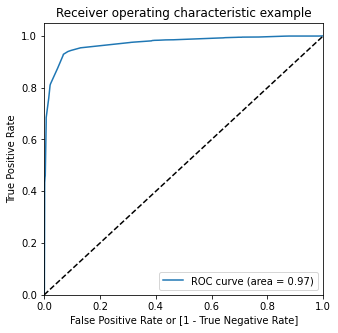

In [82]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.97 which is really good. So, the model is good to go.

### Finding Optimal Cut-Off Point

In [83]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.207452,0,1,1,1,0,0,0,0,0,0,0
1,0,0.542934,1,1,1,1,1,1,1,0,0,0,0
2,0,0.010533,0,1,0,0,0,0,0,0,0,0,0
3,1,0.964577,1,1,1,1,1,1,1,1,1,1,1
4,0,0.014054,0,1,0,0,0,0,0,0,0,0,0


In [84]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.901915  0.954113  0.869972
0.2   0.2  0.919492  0.943778  0.904629
0.3   0.3  0.930006  0.927243  0.931697
0.4   0.4  0.930006  0.927243  0.931697
0.5   0.5  0.922787  0.875155  0.951935
0.6   0.6  0.915725  0.815213  0.977232
0.7   0.7  0.914626  0.809425  0.979003
0.8   0.8  0.914626  0.809425  0.979003
0.9   0.9  0.898462  0.758991  0.983810


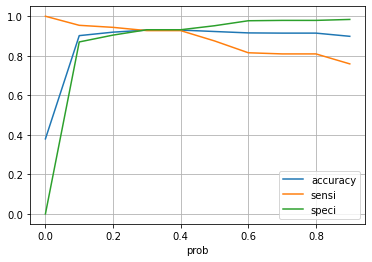

In [85]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid(True)
plt.show()

0.26 seems to be the optimal value.

In [86]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.26 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.207452,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.542934,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.010533,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.964577,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.014054,0,1,0,0,0,0,0,0,0,0,0,0


In [87]:
# Checking the overall accuracy.
train_acc=metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
train_acc

0.9300062774639046

In [88]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3683,  270],
       [ 176, 2243]])

In [89]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

In [90]:
# Sensitivity
train_sen=TP2 / float(TP2+FN2)
train_sen

0.927242662257131

In [91]:
# Specificity
train_spe=TN2 / float(TN2+FP2)
train_spe

0.9316974449784974

In [92]:
# False postive rate - predicting conversion when customer has not converted
print(FP2/ float(TN2+FP2))

0.06830255502150266


In [93]:
# Positive predictive value 
print (TP2 / float(TP2+FP2))

0.892558694787107


In [94]:
# Negative predictive value
print (TN2 / float(TN2+FN2))

0.9543923296190723


### Precision and Recall

In [95]:
from sklearn.metrics import precision_score, recall_score

In [96]:
# Precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.892558694787107

In [97]:
# Recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.927242662257131

The cutoff point seems good.

### Making predictions on the test set

In [98]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [99]:
X_test = X_test[col]
X_test.head()

,What is your current occupation_Not Provided,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Tags_Already a student,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
3504,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4050,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
7201,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1196,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8219,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [100]:
X_test_sm = sm.add_constant(X_test)

In [101]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [102]:
y_test_pred[:10]

3504    0.008699
4050    0.995532
7201    0.207452
1196    0.008699
8219    0.998464
8747    0.099151
9048    0.099151
6524    0.012938
7693    0.207452
8187    0.067000
dtype: float64

In [103]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [104]:
y_pred_1.head()

,0
3504,0.008699
4050,0.995532
7201,0.207452
1196,0.008699
8219,0.998464


In [105]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [106]:
# Putting 'Prospect ID' to index
y_test_df['ID'] = y_test_df.index

In [107]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [108]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [109]:
y_pred_final.head()

,Converted,ID,0
0,0,3504,0.008699
1,1,4050,0.995532
2,0,7201,0.207452
3,0,1196,0.008699
4,1,8219,0.998464


In [110]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [111]:
# Making predictions on the test set using 0.34 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.26 else 0)

In [112]:
y_pred_final.head()

,Converted,ID,Conversion_Prob,final_predicted
0,0,3504,0.008699,0
1,1,4050,0.995532,1
2,0,7201,0.207452,0
3,0,1196,0.008699,0
4,1,8219,0.998464,1


In [113]:
# Checking the overall accuracy.
test_acc = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
test_acc

0.9322592456975467

In [114]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1588,  101],
       [  84,  958]])

In [115]:
TP3 = confusion3[1,1] # true positive 
TN3 = confusion3[0,0] # true negatives
FP3 = confusion3[0,1] # false positives
FN3 = confusion3[1,0] # false negatives

In [116]:
# Sensitivity
test_sen = TP3 / float(TP3+FN3)
test_sen

0.9193857965451055

In [117]:
# Specificity
test_spe = TN3 / float(TN3+FP3)
test_spe

0.9402013025458852

In [118]:
# Precision
confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

0.9046270066100094

In [119]:
# Recall 
confusion3[1,1]/(confusion3[1,0]+confusion3[1,1])

0.9193857965451055

In [120]:
def analysis(data_type, acc, sen, spe):
    print('\033[1m'+data_type+':'+'\033[0m')
    print('   *Accuracy   : '+str(round(acc*100,2))+'%')
    print('   *Sensitivity: '+str(round(sen*100,2))+'%')
    print('   *Specificity: '+str(round(spe*100,2))+'%')
    print('\n')

In [121]:
print('\033[1m' +'Final Inferance'+'\033[0m'+'\n' )
analysis('Train Data',train_acc, train_sen, train_spe)
analysis('Test Data',test_acc, test_sen, test_spe)

Final Inferance

Train Data:
   *Accuracy   : 93.0%
   *Sensitivity: 92.72%
   *Specificity: 93.17%


Test Data:
   *Accuracy   : 93.23%
   *Sensitivity: 91.94%
   *Specificity: 94.02%


